In [43]:
import pandas as pd
import numpy as np
import re
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from seaborn import barplot
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

In [44]:
train = pd.read_csv('data/train_clean.csv')

In [45]:
test = pd.read_csv('data/test_clean.csv')

In [46]:
#Don't include "Unnamed:0" column. Separate features and outcome.

X_train = train.iloc[:, 1:5001]
X_test = test.iloc[:, 1:5001]
y_train = train['rating_class']
y_test = test['rating_class']

## Non-neural network Model Testing

In [47]:
models = [MultinomialNB(), LogisticRegression(), DecisionTreeClassifier(max_depth=100), RandomForestClassifier(max_depth=100)]

In [48]:
model_names = ['MultinomialNB','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier']

In [49]:
#Test models: Naive Bayes, DT, LogReg, RF

In [50]:
metrics=[]

for m,m_name in zip(models,model_names):
    
    m = m.fit(X=X_train,y=y_train)
    y_pred_train = m.predict(X_train)
    y_pred_test = m.predict(X_test)
    
    #Train metrics
    accuracy_train = m.score(X_train, y_train)
    precision_train = precision_score(y_train,y_pred_train)
    recall_train = recall_score(y_train,y_pred_train)
    f1_train = f1_score(y_train,y_pred_train)
    
    #Test metrics
    accuracy_test = m.score(X_test, y_test)
    precision_test = precision_score(y_test,y_pred_test)
    recall_test = recall_score(y_test,y_pred_test)
    f1_test = f1_score(y_test,y_pred_test)
    
    params = {
        'model': m_name
    }
        
    metrics.append(params | {'acc_train': accuracy_train,'prec_train':precision_train,
                            'recall_train':recall_train,'f1_train':f1_train,
                            'acc_test':accuracy_test,'prec_test':precision_test,
                            'recall_test':recall_test,'f1_test':f1_test})

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
pd.DataFrame(metrics).set_index('model')

,acc_train,prec_train,recall_train,f1_train,acc_test,prec_test,recall_test,f1_test
model,,,,,,,,
MultinomialNB,0.800421,0.802665,0.949055,0.869743,0.795010,0.796735,0.948544,0.866037
LogisticRegression,0.851925,0.870411,0.927121,0.897871,0.839502,0.860979,0.918559,0.888837
DecisionTreeClassifier,0.962375,0.949680,0.999361,0.973887,0.854650,0.871926,0.928277,0.899219
RandomForestClassifier,0.973217,0.963308,0.999938,0.981281,0.890314,0.873999,0.984981,0.926177


## Hyperparameter tuning of models

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
# 1. Multinomial Naive Bayes
# Hyperparameter: Alpha

In [54]:
param_grid = {"alpha": np.arange(0.1,1.1,0.1)}
grid_search = GridSearchCV(MultinomialNB(), param_grid)
grid_search.fit(X=X_train, y=y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [55]:
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)
print("Test set score: ", grid_search.score(X_test, y_test))

Best parameters:  {'alpha': 0.1}
Best cross-validation score:  0.7975660559471361
Test set score:  0.7958332554094742


In [99]:
m = MultinomialNB(alpha=0.1).fit(X=X_train,y=y_train)
y_pred_train = m.predict(X_train)
y_pred_test = m.predict(X_test)

#Train metrics
accuracy_train = m.score(X_train, y_train)
precision_train = precision_score(y_train,y_pred_train)
recall_train = recall_score(y_train,y_pred_train)
f1_train = f1_score(y_train,y_pred_train)

#Test metrics
accuracy_test = m.score(X_test, y_test)
precision_test = precision_score(y_test,y_pred_test)
recall_test = recall_score(y_test,y_pred_test)
f1_test = f1_score(y_test,y_pred_test)

In [100]:
from sklearn.metrics import confusion_matrix,roc_auc_score, roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc = roc_auc_score(y_test, y_pred_test)

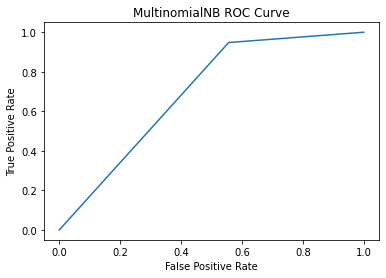

AUC: 0.6957117045157195


In [101]:
plt.plot(fpr,tpr)
plt.title('MultinomialNB ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("AUC:",auc)

In [102]:
print("Train accuracy:", accuracy_train)
print("Train precision:", precision_train)
print("Train recall:", recall_train)
print("Train F1:", f1_train)

print("Test accuracy:", accuracy_test)
print("Test precision:", precision_test)
print("Test recall:", recall_test)
print("Test F1:", f1_test)

Train accuracy: 0.8012818114939089
Train precision: 0.803972801819236
Train recall: 0.9481311772384581
Train F1: 0.8701215089603691
Test accuracy: 0.7958332554094742
Test precision: 0.7978725801726275
Test recall: 0.947847504819019
Test F1: 0.8664178647904559


In [103]:
# 2. Decision Tree
# Grid search was taking way too long. Decision Tree had used max_depth=100
# to reduce complexity and time originally,
# so we tried increasing it to 150. It performed better on both
# test and train sets so we used this value.

In [116]:
dt = DecisionTreeClassifier(max_depth=150).fit(X=X_train,y=y_train)

In [117]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

#Train metrics
accuracy_train = dt.score(X_train, y_train)
precision_train = precision_score(y_train,y_pred_train)
recall_train = recall_score(y_train,y_pred_train)
f1_train = f1_score(y_train,y_pred_train)

#Test metrics
accuracy_test = dt.score(X_test, y_test)
precision_test = precision_score(y_test,y_pred_test)
recall_test = recall_score(y_test,y_pred_test)
f1_test = f1_score(y_test,y_pred_test)

auc = roc_auc_score(y_test, y_pred_test)

In [118]:
print("Train accuracy:", accuracy_train)
print("Train precision:", precision_train)
print("Train recall:", recall_train)
print("Train F1:", f1_train)

print("Test accuracy:", accuracy_test)
print("Test precision:", precision_test)
print("Test recall:", recall_test)
print("Test F1:", f1_test)

Train accuracy: 0.9816892978715446
Train precision: 0.9748038859161515
Train recall: 0.9997602365665876
Train F1: 0.9871243506280003
Test accuracy: 0.8654597819378729
Test precision: 0.8925187421907539
Test recall: 0.9179428143071321
Test F1: 0.9050522648083622


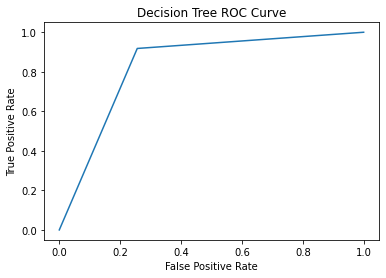

AUC: 0.8308927422239798


In [119]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr,tpr)
plt.title('Decision Tree ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("AUC:",auc)

In [120]:
# 3. Logistic regression - No hyperparameter tuning was done.
lg = LogisticRegression().fit(X=X_train,y=y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [121]:
y_pred_train = lg.predict(X_train)
y_pred_test = lg.predict(X_test)

#Train metrics
accuracy_train = lg.score(X_train, y_train)
precision_train = precision_score(y_train,y_pred_train)
recall_train = recall_score(y_train,y_pred_train)
f1_train = f1_score(y_train,y_pred_train)

#Test metrics
accuracy_test = lg.score(X_test, y_test)
precision_test = precision_score(y_test,y_pred_test)
recall_test = recall_score(y_test,y_pred_test)
f1_test = f1_score(y_test,y_pred_test)

auc = roc_auc_score(y_test, y_pred_test)

In [122]:
print("Train accuracy:", accuracy_train)
print("Train precision:", precision_train)
print("Train recall:", recall_train)
print("Train F1:", f1_train)

print("Test accuracy:", accuracy_test)
print("Test precision:", precision_test)
print("Test recall:", recall_test)
print("Test F1:", f1_test)

Train accuracy: 0.851924587588374
Train precision: 0.8704105112215293
Train recall: 0.927120796369804
Train F1: 0.8978710778770118
Test accuracy: 0.8395017860148491
Test precision: 0.860978670012547
Test recall: 0.9185585778539301
Test F1: 0.8888370767596694


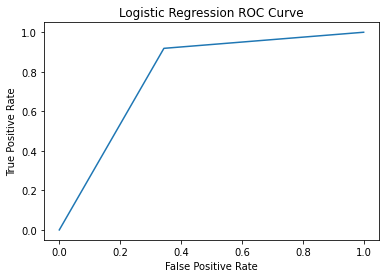

AUC: 0.7874324001621533


In [123]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr,tpr)
plt.title('Logistic Regression ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("AUC:",auc)

In [124]:
# 4. Random Forest
rf = RandomForestClassifier(max_depth=150).fit(X=X_train,y=y_train)

In [125]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

#Train metrics
accuracy_train = rf.score(X_train, y_train)
precision_train = precision_score(y_train,y_pred_train)
recall_train = recall_score(y_train,y_pred_train)
f1_train = f1_score(y_train,y_pred_train)

#Test metrics
accuracy_test = rf.score(X_test, y_test)
precision_test = precision_score(y_test,y_pred_test)
recall_test = recall_score(y_test,y_pred_test)
f1_test = f1_score(y_test,y_pred_test)

auc = roc_auc_score(y_test, y_pred_test)

In [126]:
print("Train accuracy:", accuracy_train)
print("Train precision:", precision_train)
print("Train recall:", recall_train)
print("Train F1:", f1_train)

print("Test accuracy:", accuracy_test)
print("Test precision:", precision_test)
print("Test recall:", recall_test)
print("Test F1:", f1_test)

Train accuracy: 0.9921944163892318
Train precision: 0.9890300991594719
Train recall: 0.9999733596185097
Train F1: 0.9944716251302612
Test accuracy: 0.9073516485571618
Test precision: 0.8961798082567012
Test recall: 0.9810184193617477
Test F1: 0.9366820040899795


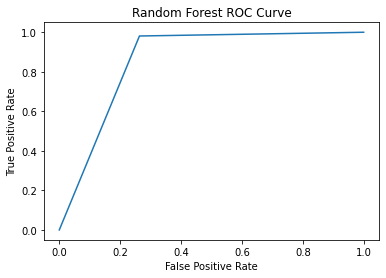

AUC: 0.8588323066471869


In [127]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
plt.plot(fpr,tpr)
plt.title('Random Forest ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("AUC:",auc)